# EDA

In this file, we investigate the dataset to get a better picture of the data we are working with.

### Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Importing and viewing the data

In [2]:
df = pd.read_csv('Data/PreProcessedData.csv')

In [3]:
df[0:5]

,IMDbRating,Title,Year,Plot,Action,Adult,Adventure,Animation,Biography,Comedy,...,Zac Efron,Zach Braff,Zach Galifianakis,Zachary Quinto,Zazie Beetz,Zoe Kazan,Zoe Saldana,Zoey Deutch,Zooey Deschanel,Zoë Kravitz
0,7.1,Aberdeen,2000,"Kaisa is a Scot, a successful London lawyer, w...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4.1,The Asylum,2000,"Plagued by endless visions and nightmares, Jen...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6.6,The Beach,2000,Garland's novel centers on a young nicotine-ad...,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5.6,Beautiful Joe,2000,"In the Bronx, Joe (Sir Billy Connolly), an Iri...",0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,7.7,Billy Elliot,2000,"County Durham, during the endless, violent 198...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
rows = len(df.axes[0])
cols = len(df.axes[1])

print("Number of Rows: ", rows)
print("Number of Columns: ", cols)

Number of Rows:  6514
Number of Columns:  958


### IMDb rating

Let's first look at the distribution of IMDb ratings.



In [5]:
ratings = list(df.loc[:,"IMDbRating"])
print(ratings[:5])

[7.1, 4.1, 6.6, 5.6, 7.7]


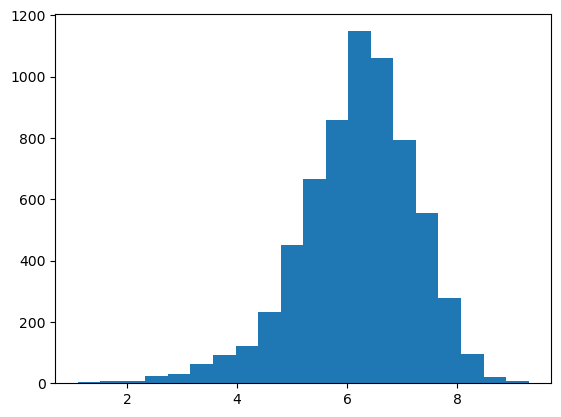

6.198679766656402

In [6]:
plt.hist(ratings, bins=20)
plt.show()
sum(ratings)/len(ratings)

The above histogram shows that the ratings approximately follow a bell curve slightly skewed towards higher scores. The average rating is just over 6, and most ratings are between 4 and 8, so we expect our model to predict mostly in this range. The fact that there is a good spread of ratings, rather than a few numbers dominating the dataset, is good news for our prediction problem as it means that we can't obtain a high accuracy on the training data by predicting the same value for each observation.

### Year

Next let's look at the years the films were released. 

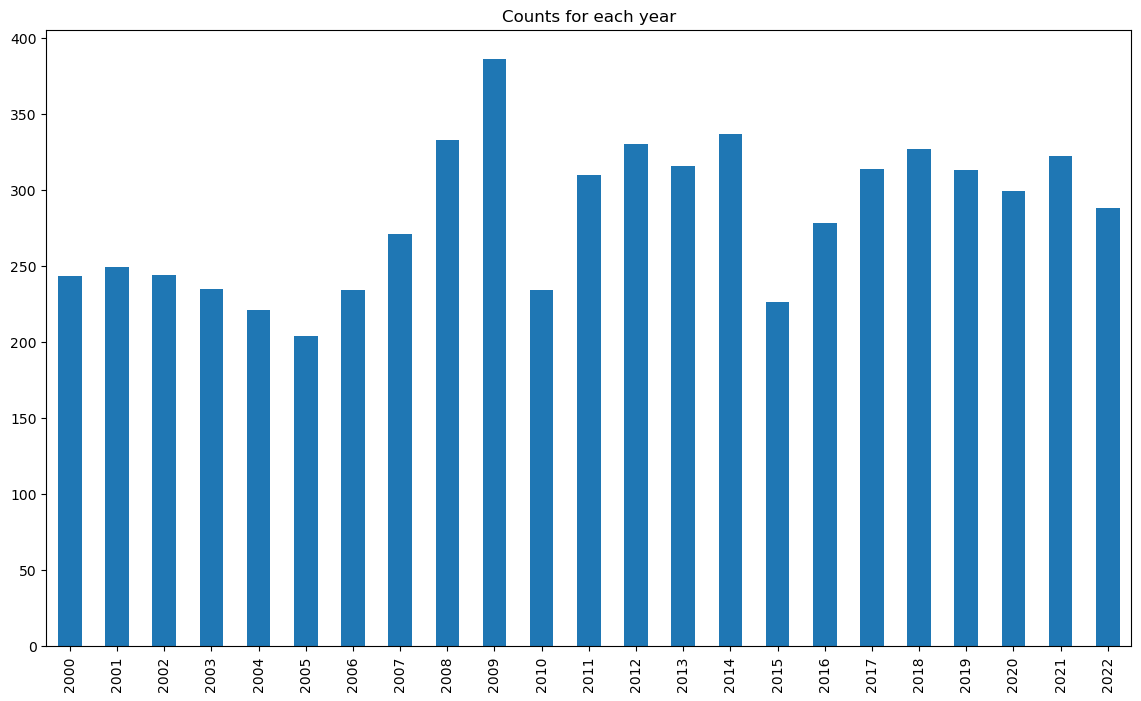

In [7]:
#grabbing the year column
v1 = df[['Year']] 
#filtering values appearing more than 10 times
v2 = df[v1.replace(v1.stack().value_counts()).gt(10).all(1)]
#plot counts
ax = v2['Year'].value_counts().sort_index().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Counts for each year")

The most common year for films in our dataset is 2008, however we have a good amount of films from each year from 200 onwards.

Do IMDb ratings vary by year?

Year
2000    6.129218
2001    6.203614
2002    6.268443
2003    6.113617
2004    6.242081
2005    6.236765
2006    6.226923
2007    6.240959
2008    6.258859
2009    6.285492
2010    6.299145
2011    6.179677
2012    6.194242
2013    6.157911
2014    6.100297
2015    6.292920
2016    6.337050
2017    6.295541
2018    6.198777
2019    6.273163
2020    5.996321
2021    6.099379
2022    5.985069
Name: IMDbRating, dtype: float64


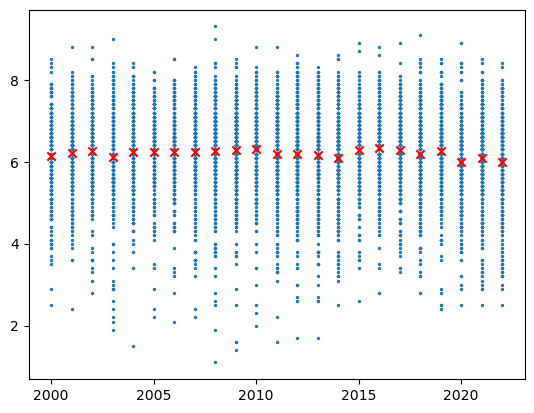

In [11]:
plt.scatter(v2['Year'], v2['IMDbRating'], s= 2)
means = df.groupby('Year')['IMDbRating'].mean()
print(means)
for year, mean_rating in means.items():
    plt.scatter(year, mean_rating, color='red', marker='x')
plt.show()

The year doesn't appear to make much difference to the imdb rating.

### Genres

In [19]:
# remove irrelevant columns
df2 = df.drop(columns=["IMDbRating", "Title", "Year", "Plot"])
df2 = df2.iloc[:,1:26]
# get column sums
counts = df2.sum(0)
counts

Adult             1
Adventure      1029
Animation       353
Biography       545
Comedy         2406
Crime          1037
Documentary     323
Drama          3479
Family          350
Fantasy         419
Film-Noir         0
History         230
Horror          742
Music           263
Musical          68
Mystery         599
News              3
Reality-TV        1
Romance        1033
Sci-Fi          409
Short            27
Sport           183
Thriller       1044
War             106
Western          28
dtype: int64

In [ ]:
plt.xticks(rotation='vertical')
plt.bar(counts.index, counts.values)

We can see that the most common film genre is the rather vague 'drama', followed by comedy. 7 genres appear more than 1000 times, so it will be interesting to see whether the number of topics in the topic models lines up with this.